In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
part = pd.read_csv('C:/Users/hyoseong/iCloudDrive/대학원/대학원 업무/Distinct_Taskk/csv/Mixed_full.csv')
# part = pd.read_csv('C:/Users/ParkHyosung/iCloudDrive/대학원/대학원 업무/Distinct_Taskk/csv/Mixed_full.csv')/
df = part

In [3]:
X = df.drop('Label', axis=1)
y = df['Label']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3) #, random_state=0

In [5]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [30]:
pipe = Pipeline([('pca', PCA()), ('LR', LogisticRegression(penalty = 'l2', max_iter = 1000, solver='newton-cg', n_jobs=-1, class_weight='balanced'))]) 

param_grid = {'pca__n_components': [9, 13, 15, 17]}

In [31]:
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5) #, error_score='raise'
grid_search.fit(X_train_std, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('LR',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1000,
                                                           n_jobs=-1,
                                                           solver='newton-cg'))]),
             param_grid={'pca__n_components': [9, 13, 15, 17]})

In [32]:
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
result = grid_search.cv_results_
print(result.keys())
print()
print(grid_search.cv_results_['mean_test_score'])

Best parameters:  {'pca__n_components': 17}
Best cross-validation score: 0.94
dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_pca__n_components', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

[0.90768571 0.92568571 0.93415714 0.93921429]


In [33]:
best_model = grid_search.best_estimator_
pred_lr = best_model.predict(X_test_std)

In [34]:
acc = accuracy_score(y_test, pred_lr)
print("Accuracy:", acc)

Accuracy: 0.9412333333333334


In [35]:
conf_matrix = confusion_matrix(y_test, pred_lr)
conf_matrix

array([[13463,  1547],
       [  216, 14774]], dtype=int64)

In [36]:
class_report = classification_report(y_test, pred_lr)
print(class_report)

              precision    recall  f1-score   support

           0       0.98      0.90      0.94     15010
           1       0.91      0.99      0.94     14990

    accuracy                           0.94     30000
   macro avg       0.94      0.94      0.94     30000
weighted avg       0.94      0.94      0.94     30000



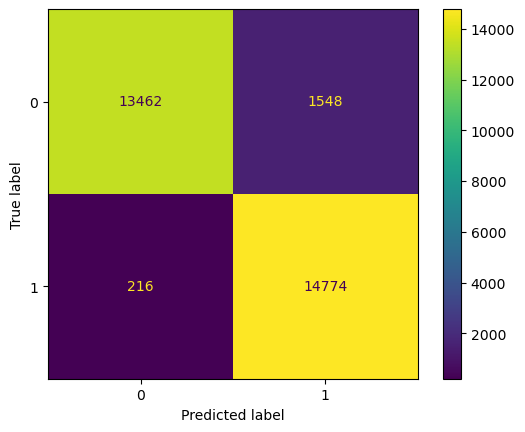

In [28]:
disp = ConfusionMatrixDisplay(conf_matrix).plot()
plt.show()

In [14]:
print(f"원본 데이터의 차원: {X_train.shape}")
X_train_transformed = best_model.named_steps['pca'].transform(X_train_std)
print(f"PCA를 거친 데이터의 차원: {X_train_transformed.shape}")

#  best_model.named_steps['pca'].transform(X_train_std)를 호출하면 학습된 PCA 변환을 X_train_std에 적용하고 차원이 축소된 변환된 데이터를 반환

원본 데이터의 차원: (70000, 72)
PCA를 거친 데이터의 차원: (70000, 17)
